# Basic Time Series Metrics & Resampling

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Compare time series growth rates

### Compare the performance of several asset classes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


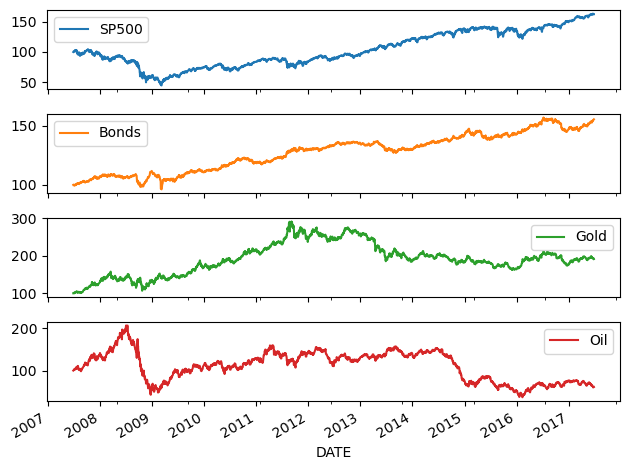

In [2]:
# Import data here
prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices) * 100

# Plot normalized
normalized.plot(subplots=True)
plt.tight_layout()
plt.show()


### Comparing stock prices with a benchmark

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


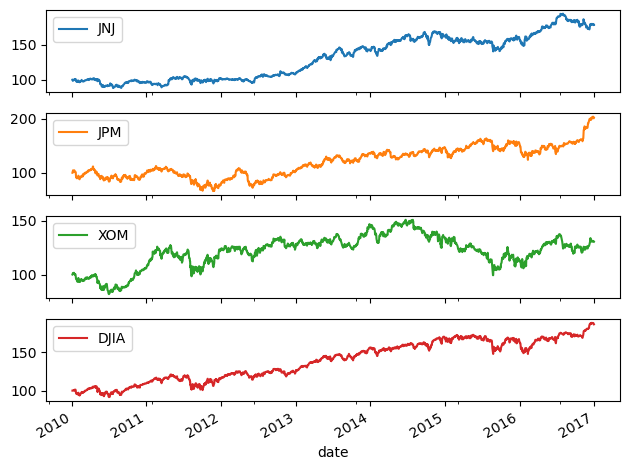

In [3]:
# Import stock prices and index here
stocks = pd.read_csv('nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot(subplots=True)
plt.tight_layout()
plt.show()


### Plot performance difference vs benchmark index

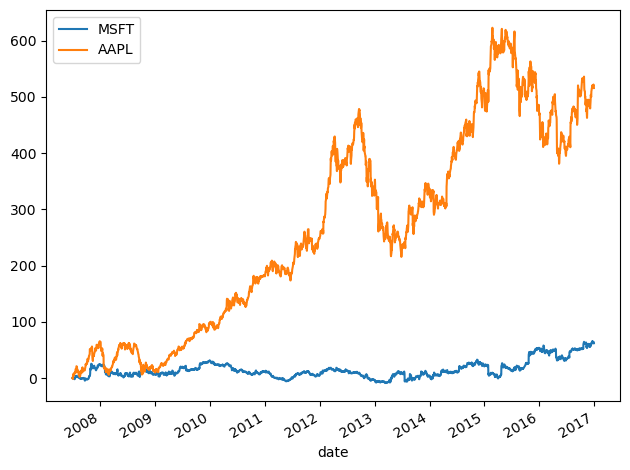

In [4]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.tight_layout()
plt.show()

## Changing the time series frequency: resampling

### Convert monthly to weekly data

In [5]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series([1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: ME, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


/tmp/ipykernel_844093/3481090229.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_dates = pd.date_range(start=start, end=end, freq='M')


### Create weekly from monthly unemployment data

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


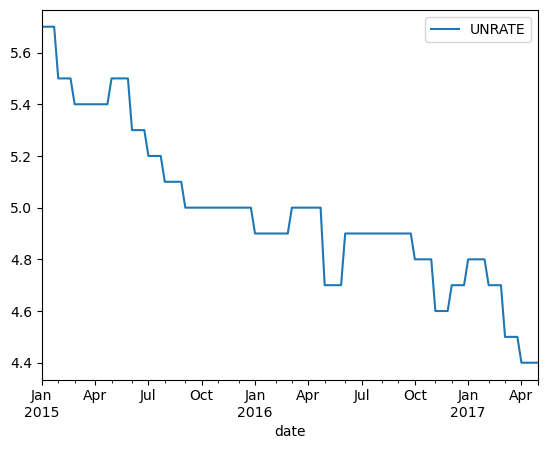

In [6]:
# Import data here
data = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head(5))

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head(5))

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head(5))

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.show()

## Upsampling & interpolation with .resample()

### Use interpolation to create weekly employment data

In [7]:
monthly = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date').loc['2010':]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB
None


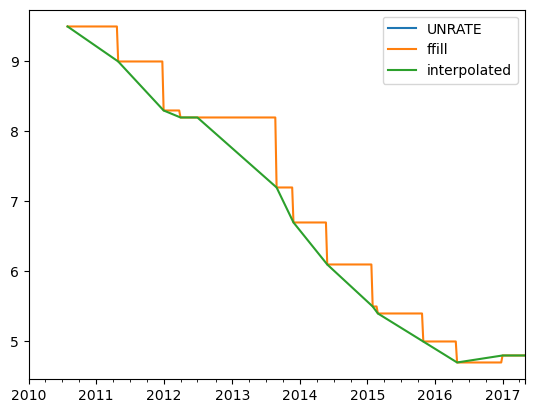

In [8]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(
    start=monthly.index.min(),
    end=monthly.index.max(),
    freq='W'
)

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly['UNRATE'].ffill()
weekly['interpolated'] = weekly['UNRATE'].interpolate()

# Plot weekly
weekly.plot()
plt.show()


### Interpolate debt/GDP and compare to unemployment

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


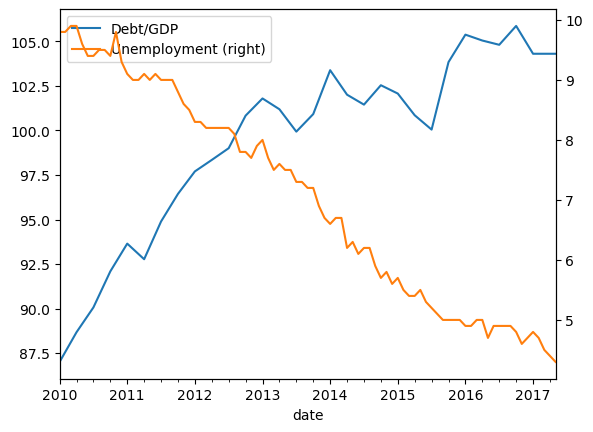

In [9]:

# Import & inspect data here
data = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

## Downsampling & aggregation

### Compare weekly, monthly and annual ozone trends for NYC & LA

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


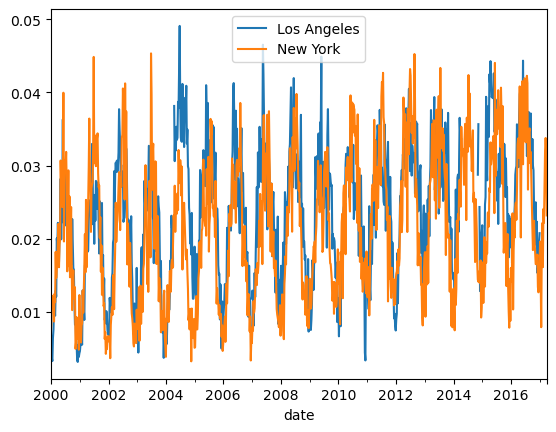

/tmp/ipykernel_844093/934818209.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ozone.resample('M').mean().plot()


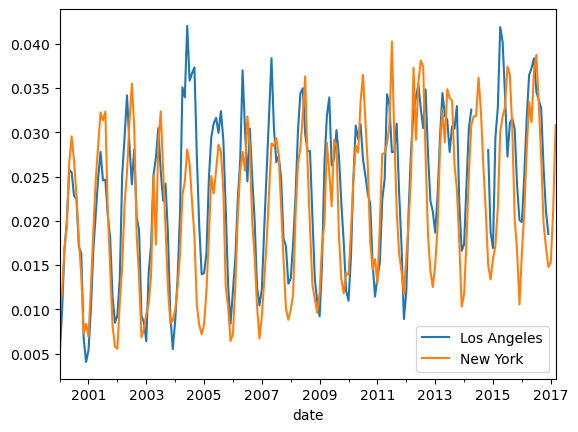

/tmp/ipykernel_844093/934818209.py:14: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ozone.resample('A').mean().plot()


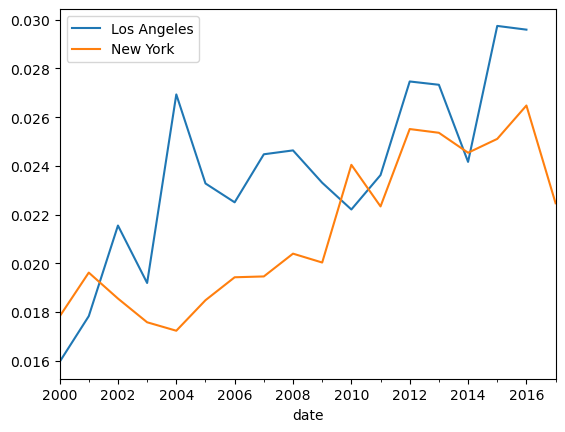

In [10]:
# Import and inspect data here
ozone = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()


### Compare monthly average stock prices for Facebook and Google

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


/tmp/ipykernel_844093/3375863971.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average = stocks.resample('M').mean()


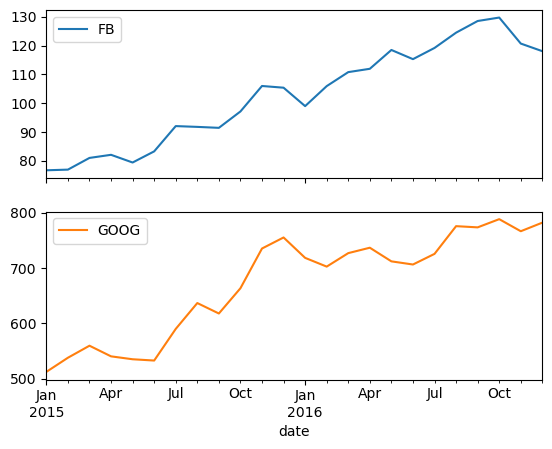

In [11]:
# Import and inspect data here
stocks = pd.read_csv('stocks.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()

### Compare quarterly GDP growth rate and stock returns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


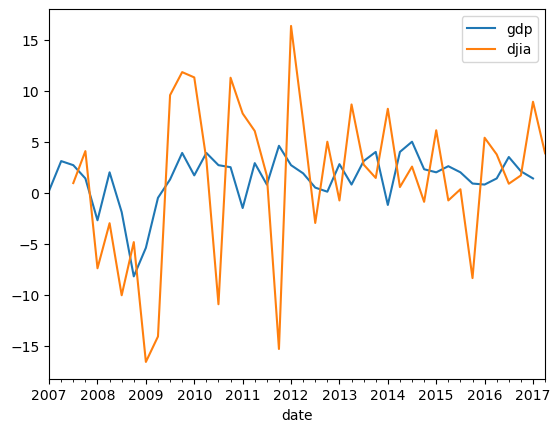

In [12]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot()
plt.show()

### Visualize monthly mean, median and standard deviation of S&P500 returns

/tmp/ipykernel_844093/617041508.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])


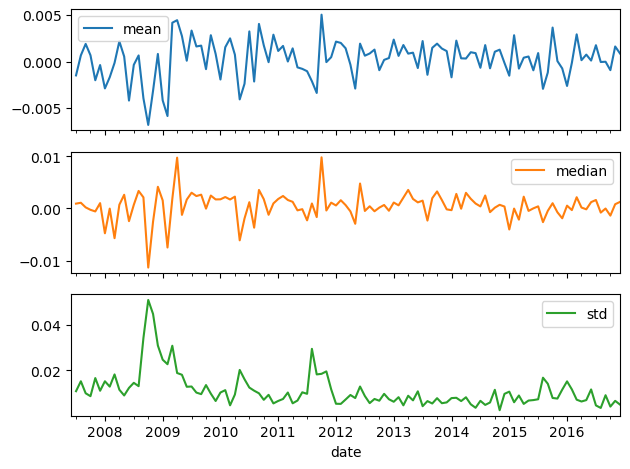

In [13]:
# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot(subplots=True)
plt.tight_layout()
plt.show()